In [10]:
import pandas as pd

train = pd.read_csv(r'D:\PycharmProjects\nlp\data\train.csv')
test = pd.read_csv(r'D:\PycharmProjects\nlp\data\test.csv')

In [11]:
train.info()
"""
函数提供有关数据信息：

RangeIndex:指定有多少数据。
Data Columns:指定找到多少列。
Columns:提供关于Columns的信息。
dtypes:它说你有什么类型的数据，你有多少这些数据。
Memory Usage:表示内存使用量。
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


'\n函数提供有关数据信息：\n\nRangeIndex:指定有多少数据。\nData Columns:指定找到多少列。\nColumns:提供关于Columns的信息。\ndtypes:它说你有什么类型的数据，你有多少这些数据。\nMemory Usage:表示内存使用量。\n'

In [12]:
train.describe()  # 函数提供了有关数据的基本统计信息（基于列计算）：count、mean、std、min、25%、50%、75%、max

,textID,text,selected_text,sentiment
count,27481,27480,27480,27481
unique,27481,27480,22463,3
top,cb774db0d1,"I`d have responded, if I were going",good,neutral
freq,1,1,199,11118


In [13]:
train.dropna(inplace=True)  # 能够找到DataFrame类型数据的空值（缺失值），将空值所在的行/列删除后，将新的DataFrame作为返回值返回
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


In [14]:
train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [15]:
temp = train.groupby('sentiment').count()['text'].reset_index().sort_values(by='text', ascending=False)

temp.style.background_gradient(cmap='Purples')

,sentiment,text
1,neutral,11117
2,positive,8582
0,negative,7781


<Axes: xlabel='sentiment', ylabel='count'>

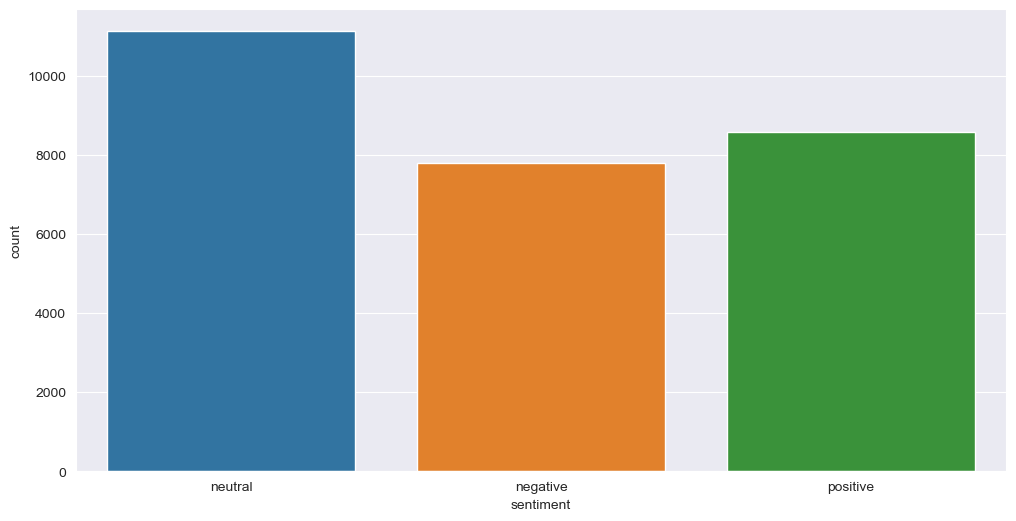

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline
plt.figure(figsize=(12, 6))
sns.countplot(x='sentiment', data=train)

D:\local temp\ipykernel_19300\2253650731.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  pl = sns.kdeplot(train['Num_words_ST'], shade=True, color="r")
D:\local temp\ipykernel_19300\2253650731.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  pl = sns.kdeplot(train['Num_word_text'], shade=True, color="b")


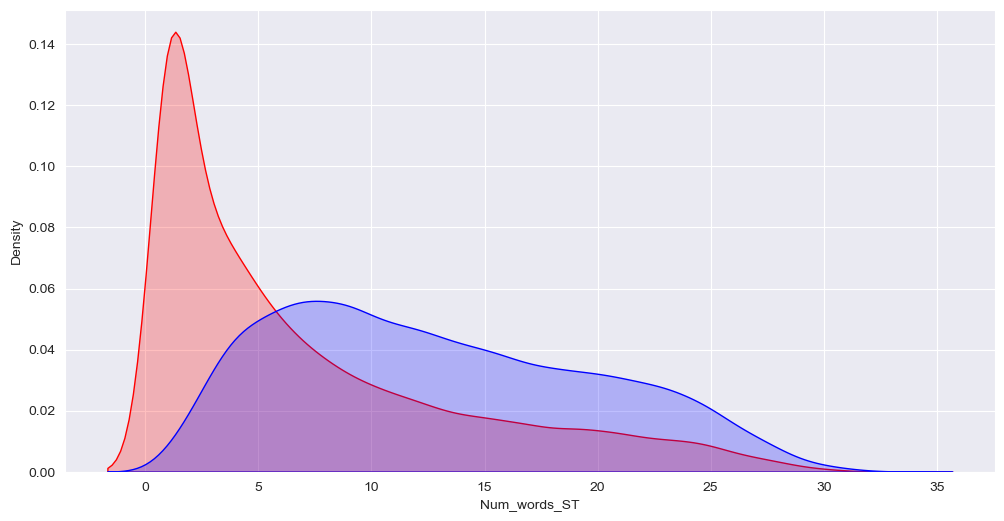

In [17]:
train['Num_words_ST'] = train['selected_text'].apply(lambda x: len(str(x).split()))  #
train['Num_word_text'] = train['text'].apply(lambda x: len(str(x).split()))  # Number Of
train['difference_in_words'] = train['Num_word_text'] - train['Num_words_ST']

# 把统计的结果可视化，使用kde来表示
plt.figure(figsize=(12, 6))
pl = sns.kdeplot(train['Num_words_ST'], shade=True, color="r")
pl = sns.kdeplot(train['Num_word_text'], shade=True, color="b")


In [18]:
# plt.figure(figsize=(12, 6))
# pl = sns.kdeplot(train[train['sentiment'] == 'positive']['difference_in_words'], shade=True, color='b').set_titile(
#     'Kernel Distribution of Difference')
# p2 = sns.kdeplot(train[train['sentiment'] == 'negative']['difference_in_words'])

# Task2.2 选择单词个数小于一定阈值数据

In [19]:
k = train[train['Num_word_text'] <= 2]
k[k['sentiment'] == 'positive']

,textID,text,selected_text,sentiment,Num_words_ST,Num_word_text,difference_in_words
68,fa2654e730,Chilliin,Chilliin,positive,1,1,0
80,bbbc46889b,THANK YYYYYYYYYOOOOOOOOOOUUUUU!,THANK YYYYYYYYYOOOOOOOOOOUUUUU!,positive,2,2,0
170,f3d95b57b1,good morning,good morning,positive,2,2,0
278,89d5b3f0b5,Thanks,Thanks,positive,1,1,0
430,a78ef3e0d0,Goodmorning,Goodmorning,positive,1,1,0
...,...,...,...,...,...,...,...
26690,e80c242d6a,Goodnight;,Goodnight;,positive,1,1,0
26726,aad244f37d,*hug*,*hug*,positive,1,1,0
26843,a46571fe12,congrats!,congrats!,positive,1,1,0
26960,49a942e9b1,Happy birthday.,Happy birthday.,positive,2,2,0


In [20]:
import re
import string


def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [21]:
train['text'] = train['text'].apply(lambda x: clean_text(x))
train['selected_text'] = train['selected_text'].apply(lambda x: clean_text(x))

In [22]:
from collections import Counter

train['temp_list'] = train['selected_text'].apply(lambda x: str(x).split())
top = Counter([item for sublist in train['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words', 'count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,i,7200
1,to,5305
2,the,4590
3,a,3538
4,my,2783
5,you,2624
6,and,2321
7,it,2158
8,is,2115
9,in,1986


In [23]:
Positive_sent = train[train['sentiment'] == 'positive']
Negative_sent = train[train['sentiment'] == 'negative']
Neutral_sent = train[train['sentiment'] == 'neutral']

# Most common positive words
top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words', 'count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,i,1040
1,good,826
2,happy,730
3,love,697
4,you,623
5,to,608
6,a,589
7,the,571
8,day,456
9,thanks,439


# Task 4: 转化标签

In [24]:
train['label'] = train.sentiment.map({'negative': 0, 'positive': 1, 'neutral': 2})

train.head(10)

,textID,text,selected_text,sentiment,Num_words_ST,Num_word_text,difference_in_words,temp_list,label
0,cb774db0d1,id have responded if i were going,id have responded if i were going,neutral,7,7,0,"[id, have, responded, if, i, were, going]",2
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,negative,2,10,8,"[sooo, sad]",0
2,088c60f138,my boss is bullying me,bullying me,negative,2,5,3,"[bullying, me]",0
3,9642c003ef,what interview leave me alone,leave me alone,negative,3,5,2,"[leave, me, alone]",0
4,358bd9e861,sons of why couldnt they put them on the rel...,sons of,negative,3,14,11,"[sons, of]",0
5,28b57f3990,some shameless plugging for the best rangers...,some shameless plugging for the best rangers...,neutral,12,12,0,"[some, shameless, plugging, for, the, best, ra...",2
6,6e0c6d75b1,feedings for the baby are fun when he is all ...,fun,positive,1,14,13,[fun],1
7,50e14c0bb8,soooo high,soooo high,neutral,2,2,0,"[soooo, high]",2
8,e050245fbd,both of you,both of you,neutral,3,3,0,"[both, of, you]",2
9,fc2cbefa9d,journey wow u just became cooler hehe is tha...,wow u just became cooler,positive,5,10,5,"[wow, u, just, became, cooler]",1


In [28]:
# import nltk
# from nltk import word_tokenize, sent_tokenize
#
# nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [30]:
from nltk import *
text = word_tokenize("They refuse to permit us to obtain the refuse permit")

In [34]:
from nltk import word_tokenize, sent_tokenize
# 短句
sentences = sent_tokenize('corpus')
sentences

['corpus']

In [33]:
from nltk.corpus import stopwords # 导入内置停用词
stop_words = stopwords.words('english')
stop_words[0:10] # 看头10个

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
# 词性标注
from nltk import pos_tag